In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

## Task 1

In [29]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [30]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [31]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [32]:
df['target'].value_counts()

,count
target,
1,526
0,499


In [33]:
df.duplicated().sum()

np.int64(723)

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


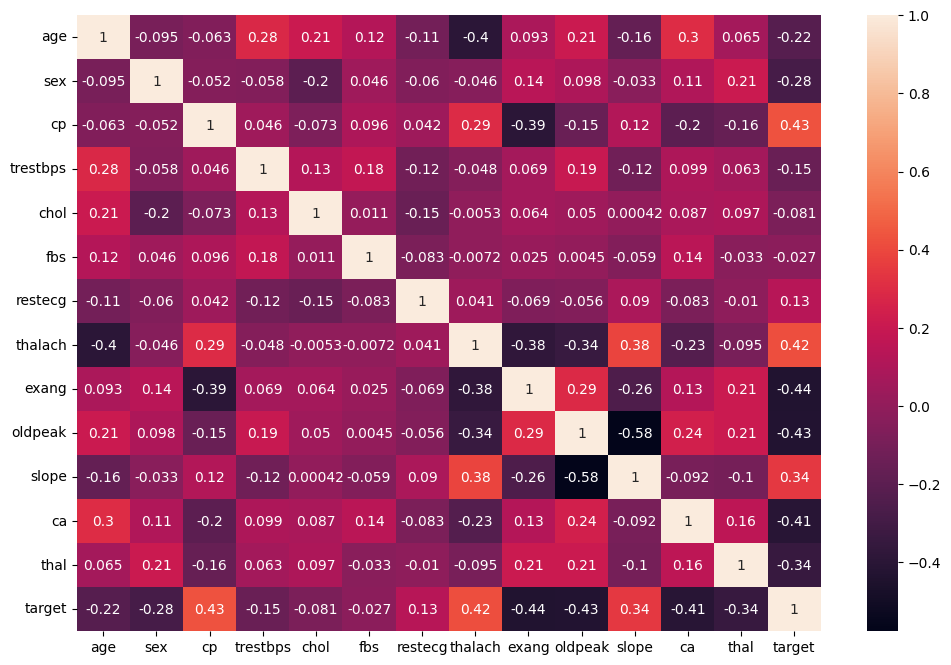

In [36]:
correlation = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True)
plt.show()

In [37]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [38]:
models = {
  'Random Forest': RandomForestClassifier(random_state=0),
  'AdaBoost': AdaBoostClassifier(random_state=0),
  'XGBoost': XGBClassifier(random_state=0)
}

In [39]:
accuracies = {}
for key, model in models.items():
  model.fit(X_train_sub, y_train_sub)
  accuracies[key] = {
    'training': model.score(X_train_sub, y_train_sub),
    'validation': model.score(X_val, y_val),
    'testing': model
  }

In [40]:
for name, scores in accuracies.items():
    print(f"Model: {name}")
    print(f"  Training Accuracy:  {scores['training']:.4f}")
    print(f"  Validation Accuracy: {scores['validation']:.4f}")
    print(f"  Model Object: {scores['testing'].__class__.__name__}")
    print("-" * 40)


Model: Random Forest
  Training Accuracy:  1.0000
  Validation Accuracy: 0.7808
  Model Object: RandomForestClassifier
----------------------------------------
Model: AdaBoost
  Training Accuracy:  0.9107
  Validation Accuracy: 0.8082
  Model Object: AdaBoostClassifier
----------------------------------------
Model: XGBoost
  Training Accuracy:  1.0000
  Validation Accuracy: 0.8219
  Model Object: XGBClassifier
----------------------------------------


## Task 2

In [41]:
x_selected = df[['restecg','oldpeak']]
y = df['target']

x_sel_train,x_sel_test,y_train,y_test = train_test_split(x_selected,y,test_size=0.2,random_state=0)

In [44]:
dt = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)

estimators = [('DT',dt),('KNN',knn),('XGB',xgb),('RF',rf)]

# hard vote
model = VotingClassifier(estimators=estimators,voting='hard')
model.fit(x_sel_train,y_train)
pred=model.predict(x_sel_test)
print(f"hard test acc: {accuracy_score(y_test,pred):.2f}")
print(f"hard training acc: {model.score(x_sel_train,y_train):.2f}")

# soft vote
model2 = VotingClassifier(estimators=estimators,voting='soft')
model2.fit(x_sel_train,y_train)
pred2 = model2.predict(x_sel_test)
print(f"\nsoft test acc: {accuracy_score(y_test,pred2):.2f}")
print(f"soft training acc: {model2.score(x_sel_train,y_train):.2f}")

hard test acc: 0.61
hard training acc: 0.78

soft test acc: 0.59
soft training acc: 0.78


In [45]:
from itertools import product
best_weights =None
best_acc =0
for weight in product([1,2,3],repeat = 4):
    weighted = VotingClassifier(
        estimators=[("dt", dt), ("knn", knn), ("rf", rf), ("xgb", xgb)],
        voting="soft",weights=weight
    )
    weighted.fit(X_train, y_train)
    soft_acc = accuracy_score(y_test, weighted.predict(X_test))
    if soft_acc > best_acc:
        best_acc = soft_acc
        best_weight = weight

print(f"Best Weights: {best_weight}, Best Accuracy: {best_acc}")

Best Weights: (1, 1, 1, 1), Best Accuracy: 0.8360655737704918


## Task 3

In [46]:
X = df[['restecg','chol']]
y = df['target']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [48]:
rf = RandomForestClassifier(n_estimators=100,random_state=0)
ada = AdaBoostClassifier(n_estimators = 100,random_state =0)

voting = VotingClassifier(estimators=
                          [('rf',rf),('ada',ada)],
                          voting = 'hard')

In [49]:
rf.fit(X_train,y_train)
ada.fit(X_train,y_train)
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=0)),
                             ('ada',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=0))])

In [50]:
rf_train_acc = accuracy_score(y_train,rf.predict(X_train))
rf_test_acc = accuracy_score(y_test,rf.predict(X_test))

ada_train_acc = accuracy_score(y_train,ada.predict(X_train))
ada_test_acc = accuracy_score(y_test,ada.predict(X_test))

In [51]:
voting_train_acc = accuracy_score(y_train,voting.predict(X_train))
voting_test_acc = accuracy_score(y_test,voting.predict(X_test))

In [52]:
print('Random Forest Training Accuracy: ',rf_train_acc)
print('Random Forest Testing Accuracy: ',rf_test_acc)
print('\nAdaBoost Training Accuracy: ',ada_train_acc)
print('AdaBoost Testing Accuracy: ',ada_test_acc)
print('\nVoting Classifier Training Accuracy: ',voting_train_acc)
print('Voting Classifier Testing Accuracy: ',voting_test_acc)

Random Forest Training Accuracy:  0.8838174273858921
Random Forest Testing Accuracy:  0.6065573770491803

AdaBoost Training Accuracy:  0.6099585062240664
AdaBoost Testing Accuracy:  0.5245901639344263

Voting Classifier Training Accuracy:  0.7344398340248963
Voting Classifier Testing Accuracy:  0.47540983606557374


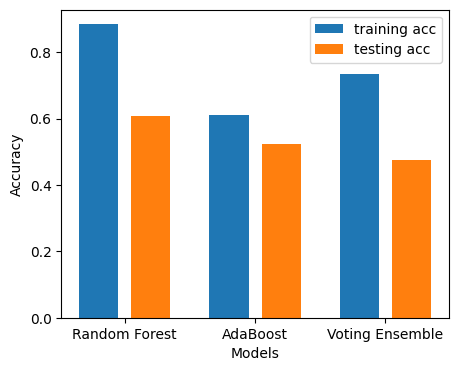

In [53]:
models = ['Random Forest','AdaBoost','Voting Ensemble']
train_acc = [rf_train_acc,ada_train_acc,voting_train_acc]
test_acc = [rf_test_acc,ada_test_acc,voting_test_acc]

x = np.arange(len(models))
plt.figure(figsize=(5,4))
plt.bar(x-0.2, train_acc ,width=0.3,label='training acc')
plt.bar(x+0.2,test_acc,width=0.3,label='testing acc')
plt.xticks(x,models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()